In [1]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 1000
p = 0.05
w = 35
beta = 0.985
alpha = 0.11
lam_X = 0.2
tol = 0.01 # Точность аппроксимации

In [3]:
def lemma(lam, s):
    """
    Функция для вычисления погрешности
    """
    return lam ** (s + 1) * min(1, (s + 1) * np.exp(-lam)) / np.math.factorial(s + 1)

In [4]:
def det_s(k_min, k_max):
    """
    Функция для определения значения s - минимального, при котором погрешность меньше заданной.
    """
    S = []
    for k in np.linspace(k_min, k_max + 1, 100):
        s = 0
        lam = n * p * np.exp(-lam_X * k)
        error = lemma(lam, s)
        while error > tol:
            s += 1
            error = lemma(lam, s)
        S.append(s)
    print(max(S))
    
det_s(8.06, 100)

14


In [5]:
s = 14

In [8]:
def F(k):
    """
    Функция аппроксимации суммарного ущерба при заданном k в точке w + (1 + alpha) * M
    """
    lam = n * p * np.exp(-lam_X * k)
    M = lam / lam_X
    x = w + (1 + alpha) * M        
    return sum([lam ** j * np.exp(-lam) * (1 - sum([(lam_X * x) ** i * np.exp(-lam_X * x) / np.math.factorial(i) for i in range(j)])) / np.math.factorial(j) for j in range(s + 1)])

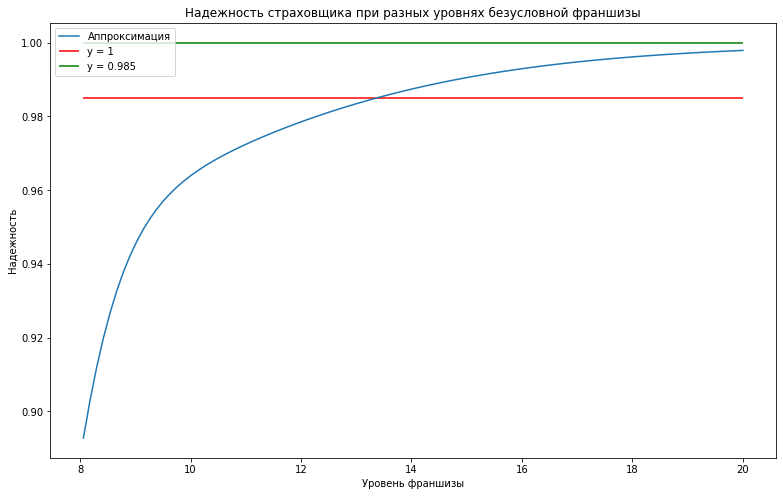

In [9]:
space = np.linspace(8.06, 20, 100)
data = [F(k) for k in space]
plt.figure(figsize=(13, 8))
plt.plot(space, data, label='Аппроксимация')
plt.hlines(beta, min(space), max(space), color='r', label='y = 1')
plt.hlines(1, min(space), max(space), color='g', label='y = 0.985')
plt.title('Надежность страховщика при разных уровнях безусловной франшизы')
plt.xlabel('Уровень франшизы')
plt.ylabel('Надежность')
plt.legend()
plt.show()

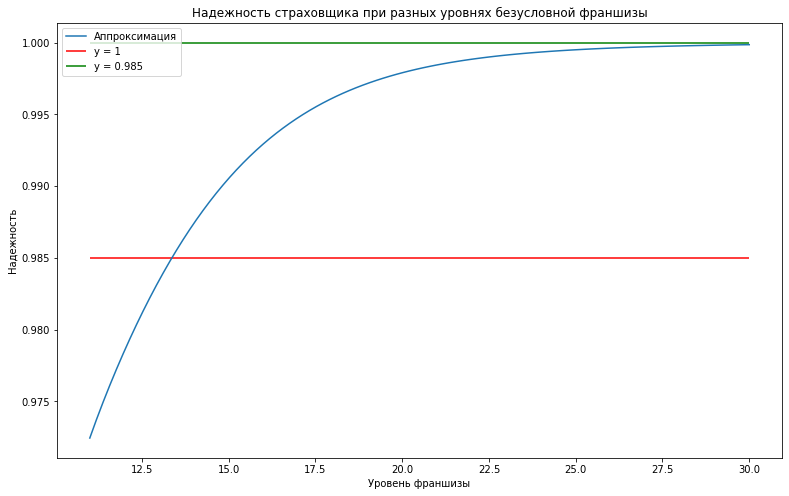

In [ ]:
space = np.linspace(11, 30, 100)
data = [F(k) for k in space]
plt.figure(figsize=(13, 8))
plt.plot(space, data, label='Аппроксимация')
plt.hlines(beta, min(space), max(space), color='r', label='y = 1')
plt.hlines(1, min(space), max(space), color='g', label='y = 0.985')
plt.title('Надежность страховщика при разных уровнях безусловной франшизы')
plt.xlabel('Уровень франшизы')
plt.ylabel('Надежность')
plt.legend()
plt.show()

In [ ]:
f = lambda x: x
F1 = lambda x: F(x) - 0.985
x0 = 13
# constr = NonlinearConstraint(F, 0.985, np.inf)
ineq_cons = {'type': 'ineq',
             'fun': F1,
            }
minimize(f, x0, method='COBYLA', constraints=ineq_cons)

     fun: 13.365958043438969
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 8
  status: 1
 success: True
       x: array(13.36595804)

Ответ к задаче 1)

In [ ]:
F(13.37)

0.9850165065791081

условная франшиза

In [10]:
def F(k):
    """
    Функция аппроксимации суммарного ущерба при заданном k в точке w + (1 + alpha) * M
    """
    lam = n * p * np.exp(-lam_X * k)
    M = lam / lam_X
    x = w + (1 + alpha) * M        
    return sum([lam ** j * np.exp(-lam) * (1 - sum([(lam_X * (x-j*k)) ** i * np.exp(-lam_X * (x-j*k)) / np.math.factorial(i) for i in range(j)])) / np.math.factorial(j) for j in range(s + 1)])

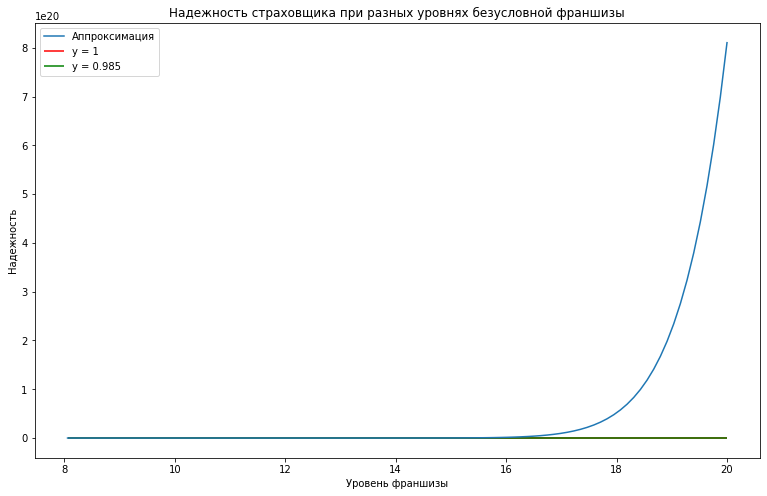

In [11]:
space = np.linspace(8.06, 20, 100)
data = [F(k) for k in space]
plt.figure(figsize=(13, 8))
plt.plot(space, data, label='Аппроксимация')
plt.hlines(beta, min(space), max(space), color='r', label='y = 1')
plt.hlines(1, min(space), max(space), color='g', label='y = 0.985')
plt.title('Надежность страховщика при разных уровнях безусловной франшизы')
plt.xlabel('Уровень франшизы')
plt.ylabel('Надежность')
plt.legend()
plt.show()

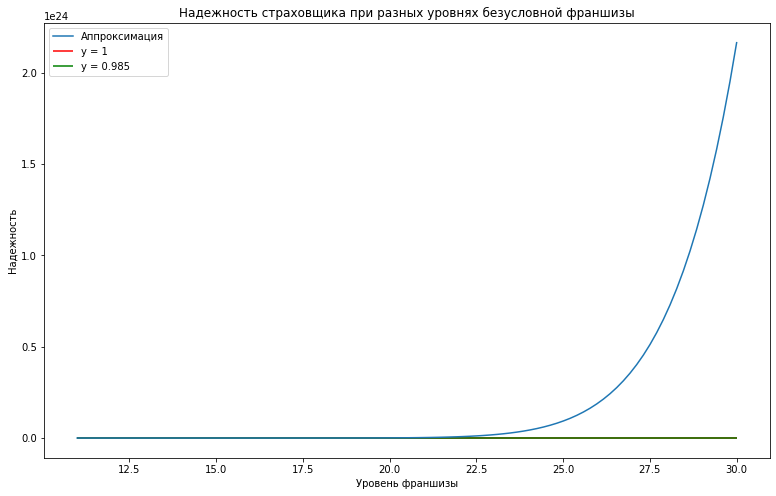

In [12]:
space = np.linspace(11, 30, 100)
data = [F(k) for k in space]
plt.figure(figsize=(13, 8))
plt.plot(space, data, label='Аппроксимация')
plt.hlines(beta, min(space), max(space), color='r', label='y = 1')
plt.hlines(1, min(space), max(space), color='g', label='y = 0.985')
plt.title('Надежность страховщика при разных уровнях безусловной франшизы')
plt.xlabel('Уровень франшизы')
plt.ylabel('Надежность')
plt.legend()
plt.show()

In [13]:
f = lambda x: x
F1 = lambda x: F(x) - 0.985
x0 = 13
# constr = NonlinearConstraint(F, 0.985, np.inf)
ineq_cons = {'type': 'ineq',
             'fun': F1,
            }
minimize(f, x0, method='COBYLA', constraints=ineq_cons)

     fun: 8.205353670888902
   maxcv: 6.527789768173697e-06
 message: 'Optimization terminated successfully.'
    nfev: 56
  status: 1
 success: True
       x: array(8.20535367)

ответ к задаче 2

In [14]:
F(8.20)

0.9151935027561509